In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle

# ***************************
# ***                     ***
# ***    SET VARIABLES    ***
# ***                     ***
# ***************************


# SYMBOLS TO PROCESS:

input_symbol_01 = "^VIX"
print(f"Symbol 01: {input_symbol_01}")

input_symbol_02 = "SPY"
# input_symbol_02 = "SVXY"
print(f"Symbol 02: {input_symbol_02}")

days_in_future_that_result_is_calculated = 250
print(f"Days in future that result is calculated: {days_in_future_that_result_is_calculated}")


Symbol 01: ^VIX
Symbol 02: SPY
Days in future that result is calculated: 250


In [2]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [4]:
from yahoo_fin.stock_info import get_data

In [5]:
# Load from Yahoo Finance API
from datetime import date
today = date.today()
curr_date = today.strftime("%m/%d/%Y")
df_01 = get_data(input_symbol_01, start_date="01/01/2000", end_date=curr_date, index_as_date = False, interval="1d")
df_01_min_date = (df_01.iloc[0]["date"])
df_01

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0.0,^VIX
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0.0,^VIX
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0.0,^VIX
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0.0,^VIX
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0.0,^VIX
...,...,...,...,...,...,...,...,...
6108,2023-06-01,17.240000,17.590000,15.580000,15.650000,15.650000,0.0,^VIX
6109,2023-06-02,15.650000,15.650000,14.420000,14.600000,14.600000,0.0,^VIX
6110,2023-06-05,15.280000,15.290000,14.660000,14.730000,14.730000,0.0,^VIX
6111,2023-06-06,14.910000,14.970000,13.950000,13.960000,13.960000,0.0,^VIX


In [6]:
# Load from Yahoo Finance API
from datetime import date
today = date.today()
curr_date = today.strftime("%m/%d/%Y")
df_02 = get_data(input_symbol_02, start_date="01/01/2000", end_date=curr_date, index_as_date = False, interval="1d")
df_02_min_date = (df_02.iloc[0]["date"])
df_02

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,148.250000,148.250000,143.875000,145.437500,94.946388,8164300,SPY
1,2000-01-04,143.531250,144.062500,139.640625,139.750000,91.233429,8089800,SPY
2,2000-01-05,139.937500,141.531250,137.250000,140.000000,91.396667,12177900,SPY
3,2000-01-06,139.625000,141.500000,137.750000,137.750000,89.927818,6227200,SPY
4,2000-01-07,140.312500,145.750000,140.062500,145.750000,95.150429,8066500,SPY
...,...,...,...,...,...,...,...,...
5890,2023-06-01,418.089996,422.920013,416.790009,421.820007,421.820007,88865000,SPY
5891,2023-06-02,424.500000,428.739990,423.950012,427.920013,427.920013,91366700,SPY
5892,2023-06-05,428.279999,429.619995,426.369995,427.100006,427.100006,65460200,SPY
5893,2023-06-06,426.670013,428.579987,425.989990,428.029999,428.029999,64022200,SPY


In [7]:
latest_date = df_01_min_date
if df_02_min_date > latest_date:
  latest_date = df_02_min_date
print(latest_date)

2000-01-03 00:00:00


In [8]:
df_01 = df_01[df_01.date >= latest_date]
df_01.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0.0,^VIX
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0.0,^VIX
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0.0,^VIX
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0.0,^VIX
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0.0,^VIX


In [9]:
df_02 = df_02[df_02.date >= latest_date]
df_02.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2000-01-03,148.25000,148.25000,143.875000,145.4375,94.946388,8164300,SPY
1,2000-01-04,143.53125,144.06250,139.640625,139.7500,91.233429,8089800,SPY
2,2000-01-05,139.93750,141.53125,137.250000,140.0000,91.396667,12177900,SPY
3,2000-01-06,139.62500,141.50000,137.750000,137.7500,89.927818,6227200,SPY
4,2000-01-07,140.31250,145.75000,140.062500,145.7500,95.150429,8066500,SPY


In [10]:
col01 = (f"{input_symbol_01}_close")
col02 = (f"{input_symbol_02}_close")
df = df_01[['date', 'close']].copy()
df = df.rename(columns={'close': col01})
df = df.merge(df_02, on='date')
df = df.rename(columns={'close': col02})
df = df.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker'])
df['future_result'] = ""
df['future_result_boolean'] = ""
df

,date,^VIX_close,SPY_close,future_result,future_result_boolean
0,2000-01-03,24.209999,145.437500,,
1,2000-01-04,27.010000,139.750000,,
2,2000-01-05,26.410000,140.000000,,
3,2000-01-06,25.730000,137.750000,,
4,2000-01-07,21.719999,145.750000,,
...,...,...,...,...,...
5890,2023-06-01,15.650000,421.820007,,
5891,2023-06-02,14.600000,427.920013,,
5892,2023-06-05,14.730000,427.100006,,
5893,2023-06-06,13.960000,428.029999,,


In [11]:
for i in range(len(df)):

    if (i < (len(df)-days_in_future_that_result_is_calculated)):
      df.future_result[i] = ((df[col02][i+days_in_future_that_result_is_calculated]-df[col02][i])/df[col02][i])

df = df[df['future_result'] != ""]

df

C:\Users\mlech\AppData\Local\Temp\ipykernel_19304\3343829065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.future_result[i] = ((df[col02][i+days_in_future_that_result_is_calculated]-df[col02][i])/df[col02][i])


,date,^VIX_close,SPY_close,future_result,future_result_boolean
0,2000-01-03,24.209999,145.437500,-0.080576,
1,2000-01-04,27.010000,139.750000,-0.06127,
2,2000-01-05,26.410000,140.000000,-0.079911,
3,2000-01-06,25.730000,137.750000,-0.019964,
4,2000-01-07,21.719999,145.750000,-0.083726,
...,...,...,...,...,...
5640,2022-06-02,24.719999,417.390015,0.010614,
5641,2022-06-03,24.790001,410.540009,0.042334,
5642,2022-06-06,25.070000,411.790009,0.037179,
5643,2022-06-07,24.020000,415.739990,0.029562,


In [12]:
df["future_result"] = pd.to_numeric(df["future_result"])

for i in range(len(df)):
    if (df['future_result'][i] > 0):
      df.future_result_boolean[i] = 1
    else:
      df.future_result_boolean[i] = 0

df["future_result_boolean"] = pd.to_numeric(df["future_result_boolean"])
df.dtypes

C:\Users\mlech\AppData\Local\Temp\ipykernel_19304\1548398896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["future_result"] = pd.to_numeric(df["future_result"])
C:\Users\mlech\AppData\Local\Temp\ipykernel_19304\1548398896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.future_result_boolean[i] = 0
C:\Users\mlech\AppData\Local\Temp\ipykernel_19304\1548398896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

date                     datetime64[ns]
^VIX_close                      float64
SPY_close                       float64
future_result                   float64
future_result_boolean             int64
dtype: object

In [13]:
df

,date,^VIX_close,SPY_close,future_result,future_result_boolean
0,2000-01-03,24.209999,145.437500,-0.080576,0
1,2000-01-04,27.010000,139.750000,-0.061270,0
2,2000-01-05,26.410000,140.000000,-0.079911,0
3,2000-01-06,25.730000,137.750000,-0.019964,0
4,2000-01-07,21.719999,145.750000,-0.083726,0
...,...,...,...,...,...
5640,2022-06-02,24.719999,417.390015,0.010614,1
5641,2022-06-03,24.790001,410.540009,0.042334,1
5642,2022-06-06,25.070000,411.790009,0.037179,1
5643,2022-06-07,24.020000,415.739990,0.029562,1


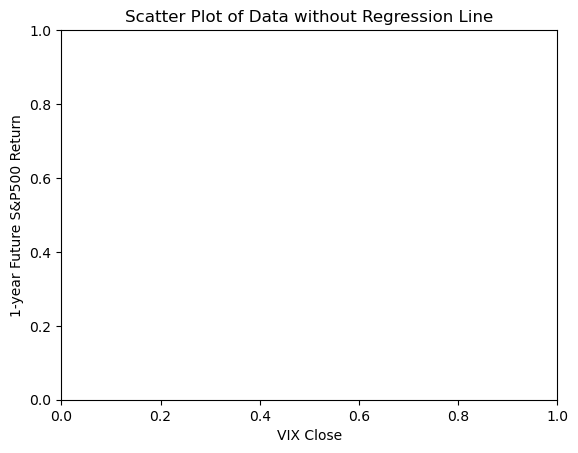

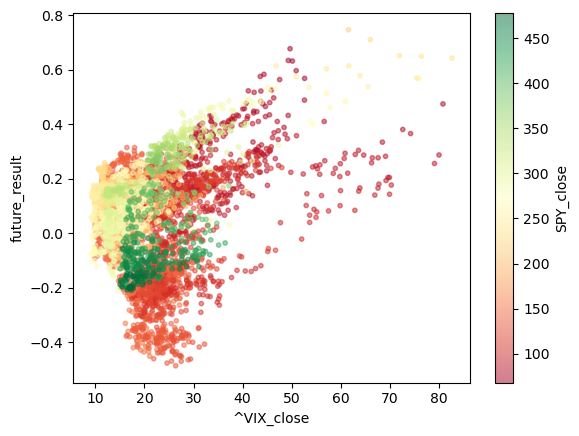

In [14]:
x_axis = col01
y_axis = 'future_result'
c_axis = col02
# Draw a scatter plot
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('VIX Close')
plt.ylabel('1-year Future S&P500 Return')
df.plot.scatter(x = x_axis, y = y_axis, c = c_axis, colormap='RdYlGn', s = 10, alpha=0.5)
plt.show()

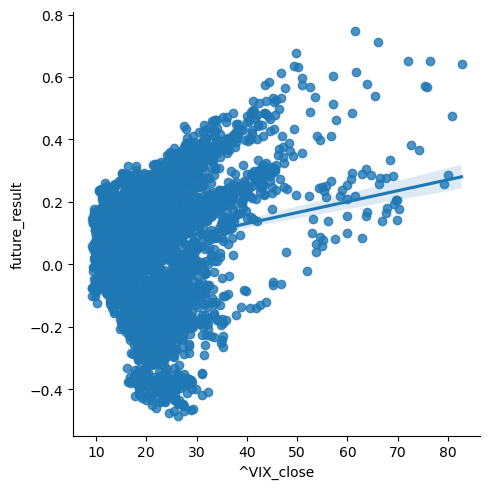

In [15]:
x_axis = col01
y_axis = 'future_result'
# Draw a scatter plot with seaborn
sns.lmplot(x=x_axis,y=y_axis,data=df,fit_reg=True)

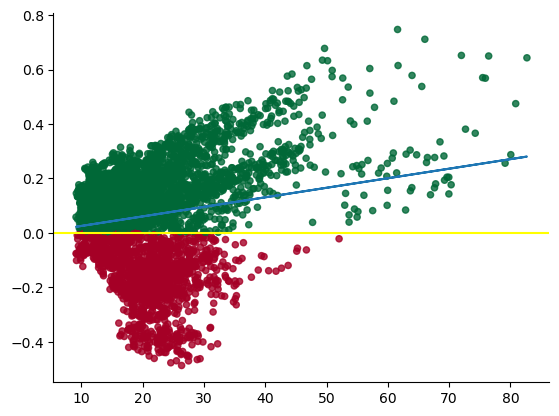

In [16]:
# Draw a scatter plot
x=df['^VIX_close'].to_numpy()
y=df['future_result'].to_numpy()
z=df['future_result_boolean'].to_numpy()

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
# plt.gca().add_patch(Rectangle((70.1, 0), 13, .2, color='green', alpha=0.1))
# plt.axvline(70.1, color='yellow')
plt.axhline(0, color='yellow')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.8, s=20)
plt.plot(x, mymodel)
plt.show()

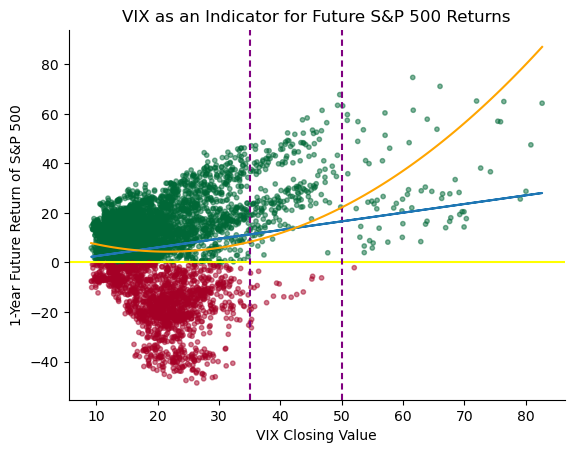

In [33]:
# Draw a scatter plot
x=df['^VIX_close'].to_numpy()
y=(df['future_result'].to_numpy())*100
z=df['future_result_boolean'].to_numpy()


# linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# non-linear function to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

fig, ax = plt.subplots()
fig.set_dpi(100.0)

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x, y)

# these are the fitted values a, b, c
a, b, c = p_opt

# produce 100 values in the range we want to cover along x
x_fit = np.linspace(min(x), max(x), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

# scatter plot
ax.scatter(x, y, c=z, cmap='RdYlGn', alpha=0.5, s=10)

plt.axhline(0, color='yellow')
plt.axvline(35, color='purple', dashes=[3, 2])
plt.axvline(50, color='purple', dashes=[3, 2])

plt.plot(x, mymodel)
ax.plot(x_fit, y_fit, c="orange")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.set_xlabel("VIX Closing Value")
ax.set_ylabel("1-Year Future Return Percetage for the S&P 500")
ax.set_title("VIX as an Indicator for Future S&P 500 Returns")
plt.savefig('static/images/vix_sp500_regressions.jpg')

In [18]:
x=df[['^VIX_close']].to_numpy()
y=df[['future_result']].to_numpy()
z=df[['future_result_boolean']].to_numpy()

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.032795668674196365
intercept: [-0.00928667]
slope: [[0.00350301]]


In [19]:
y_pred = (model.predict(x))
print(f"predicted response:\n{np.round((y_pred)*100,2)}")

predicted response:
[[7.55]
 [8.53]
 [8.32]
 ...
 [7.85]
 [7.49]
 [7.46]]


In [20]:
print("Enter the current VIX closing price: ")
s = input()
n = int(s)
# x = 70
output_array = model.predict([[n]])
formatted_array = np.round(output_array[0]*100, 1)
print(f"The expected {days_in_future_that_result_is_calculated}-day return of the S&P 500 is: ")
for i in formatted_array:
    print(f"{i}%")

Enter the current VIX closing price: 
20
The expected 250-day return of the S&P 500 is: 
6.1%


In [21]:
import pickle

In [22]:
pickle.dump(model, open("model.pkl", "wb"))

In [23]:
model = pickle.load( open('model.pkl','rb'))
model_output = model.predict([[50]])
print(model_output)

[[0.16586404]]
